# Re-analysis of old Chr21 dataset

by Pu Zheng

2021.02.25

## 0. required packages

In [3]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

34528


## 1. Create field-of-view class

In [5]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)

reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.212\Chromatin_NAS_2\20190627_IMR90_CTP05_DNA',
             'save_folder':r'E:\Pu_Temp\20190627_IMR90_chr21',
             #'save_folder':r'D:\Pu_Temp\202009_IgH_proB_DMSO_2color',
             'experiment_type': 'DNA',
             'num_threads': 16,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20191005-Corrections_3color',
             'shared_parameters':{
                     'single_im_size':[30,2048,2048],
                     'corr_channels':['750','647','561'],
                     'num_empty_frames': 0, 
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'min_num_seeds':100,
                     'max_num_seeds': 500,
                     'spot_seeding_th':150,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                 },             
             }

In [6]:
fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=3,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 266
- Number of field of views: 70
- Importing csv file: \\10.245.74.212\Chromatin_NAS_2\20190627_IMR90_CTP05_DNA\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- 255 folders are found according to color-usage annotation.
+ creating save folder: E:\Pu_Temp\20190627_IMR90_chr21
++ load bleed correction profile from original file.
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_561_2048_2048.npy
++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_30_2048_2048.npy
	 647 None
	 561 chromatic_correction_561_647_30_2048_2048.npy
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 750 chromatic_correction_750_647_30_2048_2048_const.p

## 2. Process image into candidate spots

In [12]:
reload(io_tools.load)
reload(spot_tools.fitting)
reload(correction_tools.chromatic)
reload(classes.batch_functions)

# process image into spots
id_list, spot_list = fov._process_image_to_spots('unique', 
                                                 #_sel_ids=np.arange(41,47),
                                                 _load_common_reference=True,
                                                 _load_with_multiple=False,
                                                 _save_images=True,
                                                 _warp_images=False, 
                                                 _overwrite_drift=False,
                                                 _overwrite_image=False,
                                                 _overwrite_spot=False,
                                                 _verbose=True)

-- No folder selected, allow processing all 255 folders
-- checking unique, region:[369 370 368] in 0.004s.
-- checking unique, region:[372 373 371] in 0.004s.
-- checking unique, region:[376 374 375] in 0.004s.
-- checking unique, region:[379 377 378] in 0.004s.
-- checking unique, region:[382 380 381] in 0.004s.
-- checking unique, region:[385 383 384] in 0.004s.
-- checking unique, region:[388 386 387] in 0.003s.
-- checking unique, region:[389 390 391] in 0.003s.
-- checking unique, region:[392 393 394] in 0.004s.
-- checking unique, region:[395 396 397] in 0.004s.
-- checking unique, region:[398 399 400] in 0.003s.
-- checking unique, region:[401 402 403] in 0.004s.
-- checking unique, region:[404 405 406] in 0.003s.
-- checking unique, region:[409 407 408] in 0.004s.
-- checking unique, region:[642 643 650] in 0.004s.
-- checking unique, region:[639 637 647] in 0.004s.
-- checking unique, region:[630 619 644] in 0.004s.
-- checking unique, region:[615 616 629] in 0.003s.
-- check

-- checking unique, region:[514 521 504] in 0.004s.
-- checking unique, region:[517 524 510] in 0.004s.
-- checking unique, region:[520 527 513] in 0.003s.
-- checking unique, region:[523 530 516] in 0.003s.
-- checking unique, region:[526 533 519] in 0.003s.
-- checking unique, region:[529 536 522] in 0.004s.
-- checking unique, region:[532 539 525] in 0.003s.
-- checking unique, region:[535 544 528] in 0.004s.
-- checking unique, region:[538 550 531] in 0.003s.
-- checking unique, region:[541 553 534] in 0.004s.
-- checking unique, region:[543 559 537] in 0.003s.
-- checking unique, region:[549 562 540] in 0.003s.
-- checking unique, region:[552 565 545] in 0.004s.
-- checking unique, region:[555 571 548] in 0.004s.
-- checking unique, region:[561 551] in 0.004s.
-- checking unique, region:[564 581 554] in 0.004s.
-- checking unique, region:[567 584 557] in 0.005s.
-- checking unique, region:[570 587 560] in 0.004s.
-- checking unique, region:[573 590 563] in 0.004s.
-- checking uniq

## 3. Find chromosomes

In [14]:
# load chromosome image
chrom_im = fov._load_chromosome_image(_type='forward', _overwrite=False)

No forward chrom detected in color usage, generate chromosome with existing data
- Generate chromosome image from unique images, 651 images planned to load.
- loading unique info from file:Conv_zscan_03.hdf5 in 34.887s.
-- shifting images in 47.792s. 
- loading unique info from file:Conv_zscan_03.hdf5 in 35.439s.
-- shifting images in 47.782s. 
- loading unique info from file:Conv_zscan_03.hdf5 in 35.440s.
-- shifting images in 50.290s. 
- loading unique info from file:Conv_zscan_03.hdf5 in 32.192s.
-- shifting images in 48.932s. 
- loading unique info from file:Conv_zscan_03.hdf5 in 35.478s.
-- shifting images in 48.832s. 
- loading unique info from file:Conv_zscan_03.hdf5 in 37.716s.
-- shifting images in 48.064s. 
- loading unique info from file:Conv_zscan_03.hdf5 in 38.391s.
-- shifting images in 49.157s. 
- loading unique info from file:Conv_zscan_03.hdf5 in 17.210s.
-- shifting images in 48.010s. 
- loading unique info from file:Conv_zscan_03.hdf5 in 37.934s.
-- shifting images i

In [15]:
# Find candidate chromosomes
chrom_coords = fov._find_candidate_chromosomes_by_segmentation(_filt_size=4,
                                                               _binary_per_th=99.5, 
                                                               _morphology_size=2,
                                                               _overwrite=True)


-- adjust seed image with filter size=4
-- binarize image with threshold: 99.5%
-- erosion and dialation with size=2.
-- find close objects.
-- random walk segmentation, beta=10.


E:\Users\puzheng\Documents\ImageAnalysis3\segmentation_tools\chromosome.py:79: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  _seg_label = random_walker(adj_chrom_im, _label, beta=10, mode='cg_mg')


-- find objects larger than size=50
-- 148 objects are found by segmentation.
- Start multiprocessing caluclate chromosome coordinates with 20 threads in 107.419s.
-- saving fov_info to file: E:\Pu_Temp\20190627_IMR90_chr21\Conv_zscan_03.hdf5
++ base attributes saved:['cand_chrom_coords'] in 0.086s.


In [16]:
fov._load_from_file('unique')

chrom_coords = fov._select_chromosome_by_candidate_spots(_good_chr_loss_th=0.3,
                                                         _cand_spot_intensity_th=1,
                                                         _save=True, 
                                                         _overwrite=False)

+ loading unique from file: E:\Pu_Temp\20190627_IMR90_chr21\Conv_zscan_03.hdf5
+ loading fov_info from file: E:\Pu_Temp\20190627_IMR90_chr21\Conv_zscan_03.hdf5
++ base attributes loaded:[] in 2.259s.
- start select from 148 chromosomes with loss threshold=0.3
-- remove chr id 123, percentage of lost rounds:1.000.
-- remove chr id 25, percentage of lost rounds:0.833.
-- remove chr id 31, percentage of lost rounds:0.667.
-- remove chr id 47, percentage of lost rounds:0.667.
-- remove chr id 69, percentage of lost rounds:0.667.
-- remove chr id 80, percentage of lost rounds:0.667.
-- remove chr id 88, percentage of lost rounds:0.667.
-- remove chr id 107, percentage of lost rounds:0.667.
-- remove chr id 124, percentage of lost rounds:0.667.
-- remove chr id 21, percentage of lost rounds:0.500.
-- remove chr id 57, percentage of lost rounds:0.500.
-- remove chr id 80, percentage of lost rounds:0.500.
-- remove chr id 80, percentage of lost rounds:0.500.
-- remove chr id 93, percentage of 

<IPython.core.display.Javascript object>


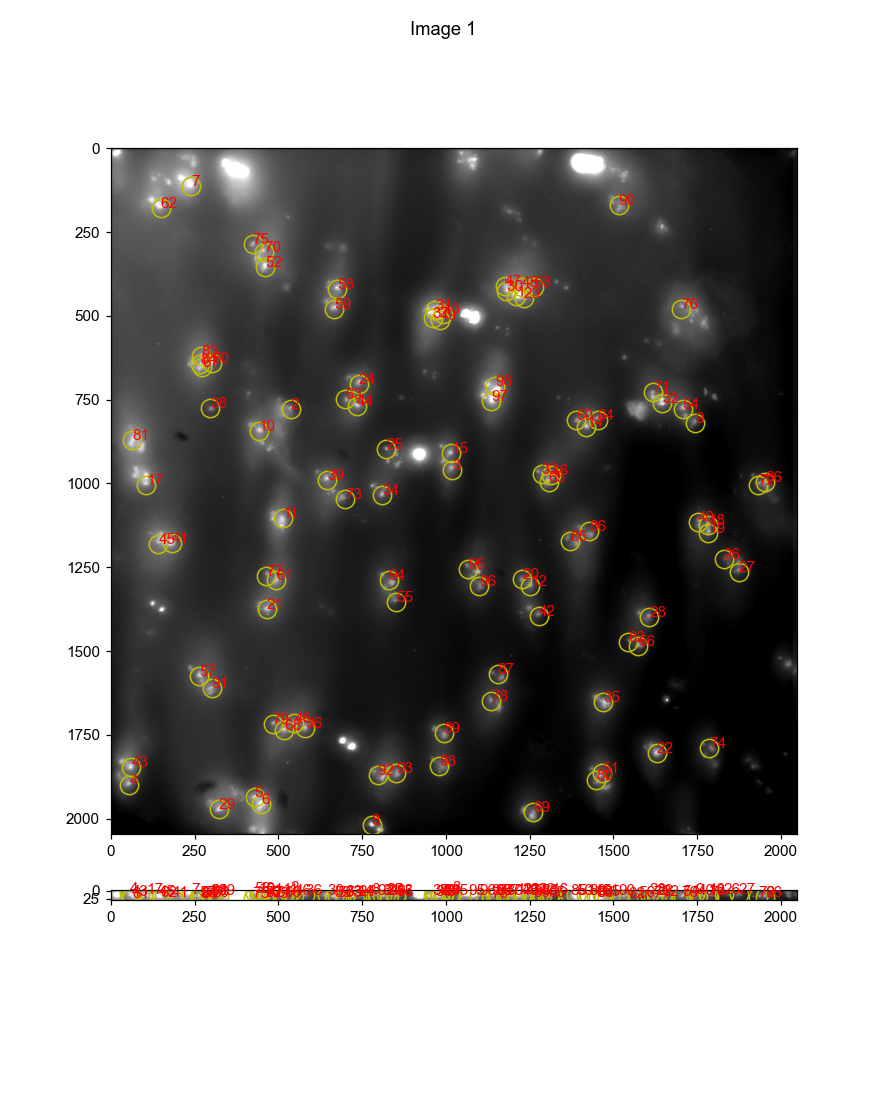

In [25]:
# visualize chromosome selections
%matplotlib notebook
%matplotlib notebook

coord_dict = {'coords':[np.flipud(_coord) for _coord in fov.chrom_coords],
              'class_ids':list(np.zeros(len(fov.chrom_coords),dtype=np.int)),
             }

visual_tools.imshow_mark_3d_v2([fov.chrom_im], 
                               given_dic=coord_dict,
                               save_file=None,
                               min_max_default=[4e5,8e5],
                               )

## 4. select spots based on chromosomes

In [46]:
fov._load_from_file('unique', _overwrite=True)

+ loading unique from file: E:\Pu_Temp\20190627_IMR90_chr21\Conv_zscan_03.hdf5
++ finish loading unique in 0.058s. 


In [47]:
len(fov.unique_spots_list)

651

In [50]:
intensity_th = 200
from ImageAnalysis3.spot_tools.picking import assign_spots_to_chromosomes

kept_spots_list = []
for _spots in fov.unique_spots_list:
    kept_spots_list.append(_spots[_spots[:,0] > intensity_th])
# finalize candidate spots
cand_chr_spots_list = [[] for _ct in fov.chrom_coords]
for _spots in kept_spots_list:
    _cands_list = assign_spots_to_chromosomes(_spots, fov.chrom_coords)
    for _i, _cands in enumerate(_cands_list):
        cand_chr_spots_list[_i].append(_cands)
print(f"kept chromosomes: {len(fov.chrom_coords)}")

kept chromosomes: 117


In [51]:
reload(spot_tools.picking)
from ImageAnalysis3.spot_tools.picking import convert_spots_to_hzxys

dna_cand_hzxys_list = [convert_spots_to_hzxys(_spots, fov.shared_parameters['distance_zxy'])
                       for _spots in cand_chr_spots_list]
dna_reg_ids = fov.unique_ids

In [52]:
# select_hzxys close to the chromosome center
dist_th = 6000 # upper limit is 5000nm
intensity_th = 200
sel_dna_cand_hzxys_list = []
for _cand_hzxys, _chrom_coord in zip(dna_cand_hzxys_list, chrom_coords):
    _sel_cands_list = []
    for _cands in _cand_hzxys:
        if len(_cands) == 0:
            _sel_cands_list.append([])
        else:
            _dists = np.linalg.norm(_cands[:,1:4] - _chrom_coord*np.array([200,108,108]), axis=1)
            _sel_cands_list.append(_cands[(_dists < dist_th) & (_cands[:,0]>=intensity_th)])
            
    # append
    sel_dna_cand_hzxys_list.append(_sel_cands_list)

### EM pick spots

- iter:0
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 12.554s
-- collapse all regions into 1d.


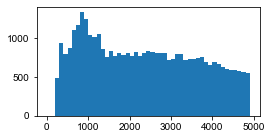

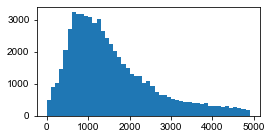

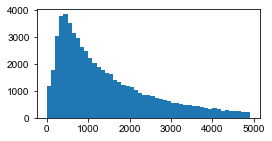

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 11.592s
-- region kept: 0.8336
- iter:1
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 12.456s
-- collapse all regions into 1d.


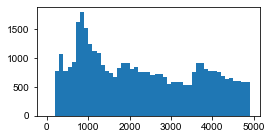

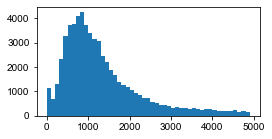

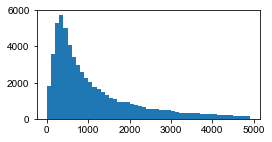

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 11.651s
-- region kept: 0.9444
- iter:2
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 12.444s
-- collapse all regions into 1d.


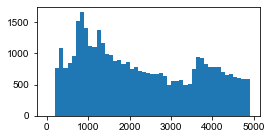

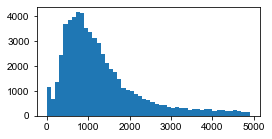

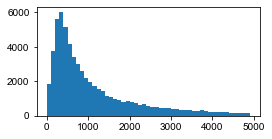

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 11.808s
-- region kept: 0.9719
- iter:3
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 12.446s
-- collapse all regions into 1d.


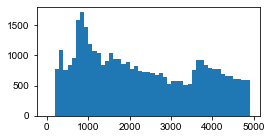

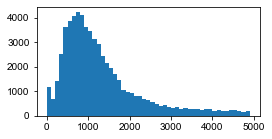

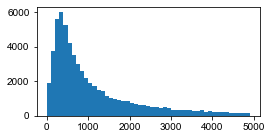

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 11.670s
-- region kept: 0.9783
- iter:4
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 12.346s
-- collapse all regions into 1d.


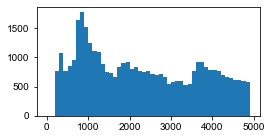

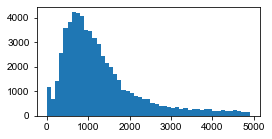

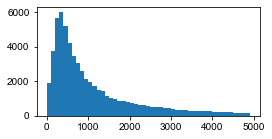

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 11.699s
-- region kept: 0.9740
- iter:5
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 12.351s
-- collapse all regions into 1d.


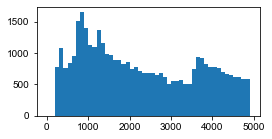

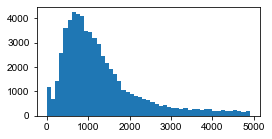

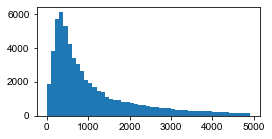

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 11.793s
-- region kept: 0.9819
- iter:6
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 12.449s
-- collapse all regions into 1d.


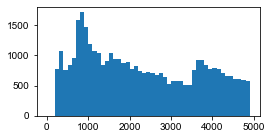

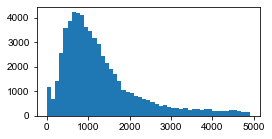

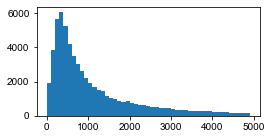

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 11.644s
-- region kept: 0.9940
- iter:7
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 12.441s
-- collapse all regions into 1d.


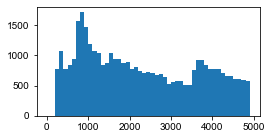

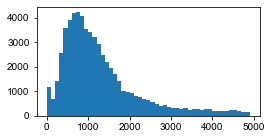

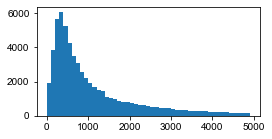

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 11.744s
-- region kept: 0.9850
- iter:8
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 12.450s
-- collapse all regions into 1d.


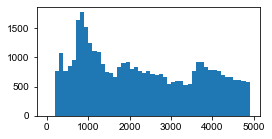

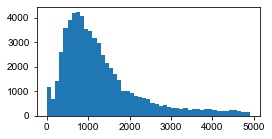

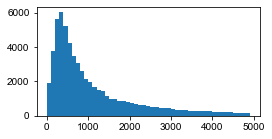

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 11.660s
-- region kept: 0.9762
- iter:9
- generate reference metrics from picked chrs.
-- multiprocessing process references with 12 threads, in 12.448s
-- collapse all regions into 1d.


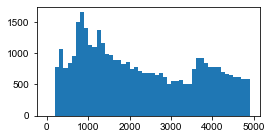

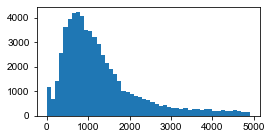

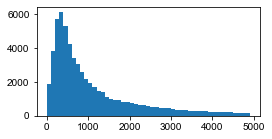

- start EM picking.
-- directly use given reference.
-- multiprocessing maximization step with 12 threads, in 11.853s
-- region kept: 0.9828


In [53]:
reload(ia.spot_tools.picking)
# load functions
from ImageAnalysis3.spot_tools.picking import Pick_spots_by_intensity, EM_pick_scores_in_population, generate_reference_from_population,evaluate_differences

%matplotlib inline
niter= 10
nkeep = len(sel_dna_cand_hzxys_list)
num_threads = 12
# initialize
init_dna_hzxys = Pick_spots_by_intensity(sel_dna_cand_hzxys_list[:nkeep])
# set save list
sel_dna_hzxys_list, sel_dna_scores_list, all_dna_scores_list = [init_dna_hzxys], [], []
for _iter in range(niter):
    print(f"- iter:{_iter}")
    # generate reference
    ref_ct_dists, ref_local_dists, ref_ints = generate_reference_from_population(
        sel_dna_hzxys_list[-1], dna_reg_ids, 
        sel_dna_hzxys_list[-1][:nkeep], dna_reg_ids,
        num_threads=num_threads,
        collapse_regions=True,
    )
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_ints), bins=np.arange(0,10000,250))
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_ct_dists), bins=np.arange(0,5000,100))
    plt.figure(figsize=(4,2))
    plt.hist(np.ravel(ref_local_dists), bins=np.arange(0,5000,100))
    plt.show()
    # scoring
    sel_hzxys, sel_scores, all_scores = EM_pick_scores_in_population(
            sel_dna_cand_hzxys_list[:nkeep], dna_reg_ids, sel_dna_hzxys_list[-1], 
            ref_ct_dists, ref_local_dists, ref_ints,
            sel_dna_hzxys_list[-1], dna_reg_ids, num_threads=num_threads,
        )
    update_rate = evaluate_differences(sel_hzxys, sel_dna_hzxys_list[-1])
    print(f"-- region kept: {update_rate:.4f}")
    sel_dna_hzxys_list.append(sel_hzxys)
    sel_dna_scores_list.append(sel_scores)
    all_dna_scores_list.append(all_scores)
    
    if update_rate > 0.995:
        break

In [59]:
from scipy.spatial.distance import pdist, squareform
sel_iter = -1

final_dna_hzxys_list = []
kept_chr_ids = []
distmap_list = []
score_th = np.exp(-10)
int_th = 500
bad_spot_percentage = 0.5

for _hzxys, _scores in zip(sel_dna_hzxys_list[sel_iter], sel_dna_scores_list[sel_iter]):
    _kept_hzxys = np.array(_hzxys).copy()
    _bad_inds = _kept_hzxys[:,0] < int_th
    _kept_hzxys[_bad_inds] = np.nan
    #_kept_hzxys[_scores < score_th] = np.nan
    
    
    if np.mean(np.isnan(_kept_hzxys).sum(1)>0)<bad_spot_percentage:
        kept_chr_ids.append(True)
        final_dna_hzxys_list.append(_kept_hzxys)
        distmap_list.append(squareform(pdist(_kept_hzxys[:,1:4])))
    else:
        kept_chr_ids.append(False)

kept_chr_ids = np.array(kept_chr_ids, dtype=np.bool)
distmap_list = np.array(distmap_list)
median_distmap = np.nanmedian(distmap_list, axis=0)

0.10435663627152988


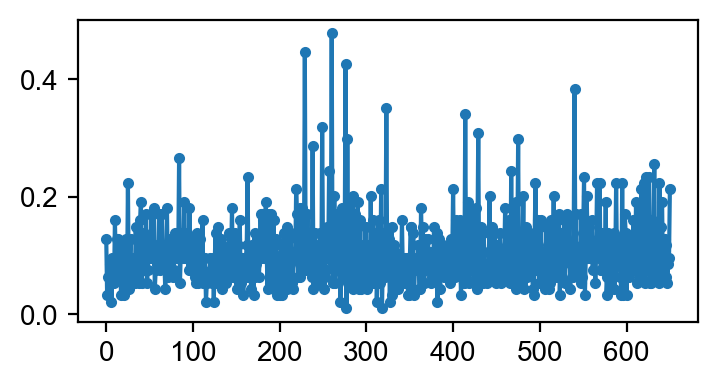

In [60]:
loss_rates = np.mean(np.sum(np.isnan(final_dna_hzxys_list), axis=2)>0, axis=0)
print(np.mean(loss_rates))
fig, ax = plt.subplots(figsize=(4,2),dpi=200)
ax.plot(loss_rates, '.-')
ax.set_xticks(np.arange(0,len(median_distmap),100))
plt.show()

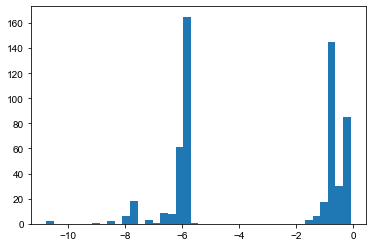

In [58]:
plt.figure()
plt.hist(np.log(sel_dna_scores_list[-1][0]), 40)
plt.show()

<IPython.core.display.Javascript object>


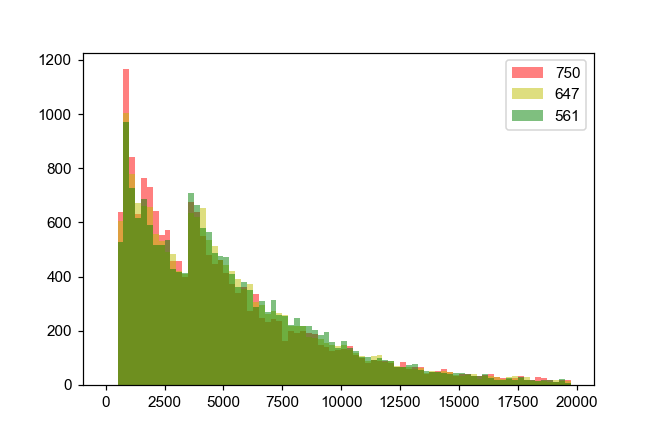

In [84]:
cy7_ints = np.array(final_dna_hzxys_list)[:,0::3,0]
cy5_ints = np.array(final_dna_hzxys_list)[:,1::3,0]
cy3_ints = np.array(final_dna_hzxys_list)[:,2::3,0]

plt.figure(dpi=100)
plt.hist(np.ravel(cy7_ints), bins=np.arange(0,20000,250), 
         alpha=0.5, color='r', label='750')
plt.hist(np.ravel(cy5_ints), bins=np.arange(0,20000,250), 
         alpha=0.5, color='y', label='647')
plt.hist(np.ravel(cy3_ints), bins=np.arange(0,20000,250), 
         alpha=0.5, color='g', label='561')
plt.legend()
plt.show()

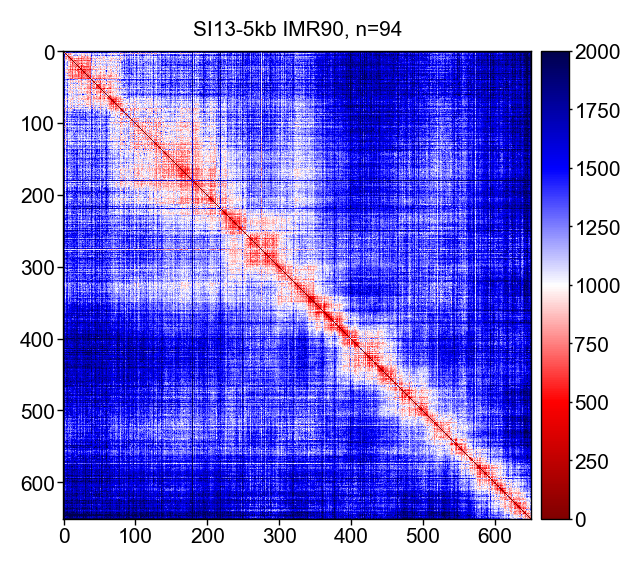

In [66]:
fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(median_distmap,
                                               #median_distmap[2::3,2::3], 
                                               color_limits=[0,2000],
                                               ax=ax,
                                               ticks=np.arange(0,len(fov.unique_ids),100), 
                                               figure_dpi=200)
ax.set_title(f"SI13-5kb IMR90, n={len(distmap_list)}", fontsize=7.5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()

<IPython.core.display.Javascript object>


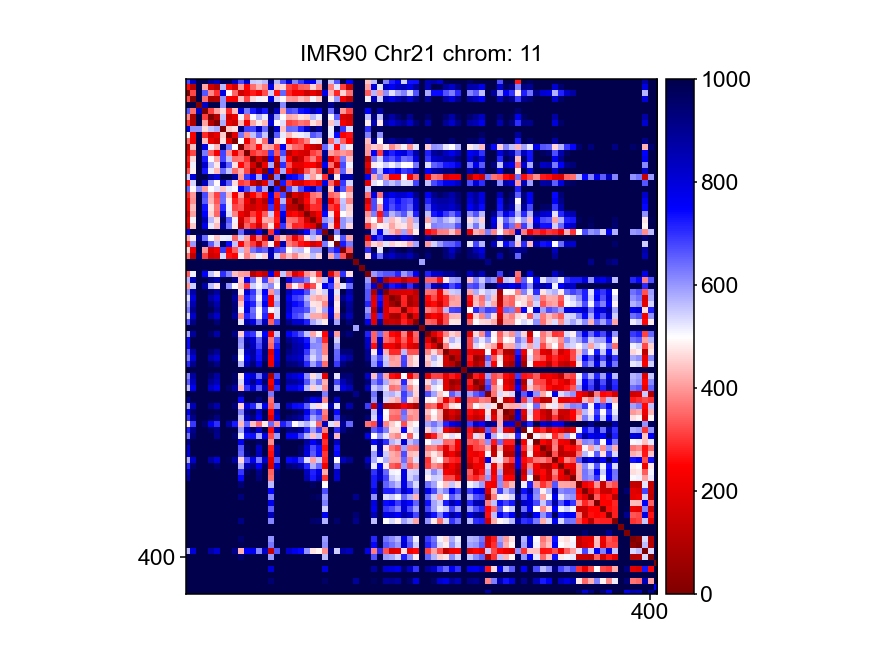

<IPython.core.display.Javascript object>


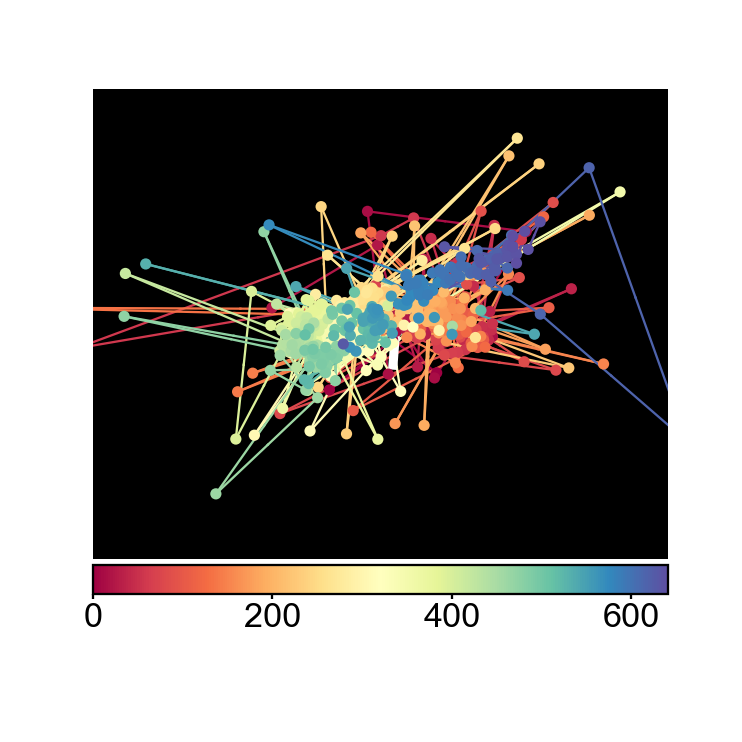

-- add colorbar with colornorm: <matplotlib.colors.Normalize object at 0x00000127367FD588>


In [83]:
%matplotlib notebook
%matplotlib notebook

chrom_id = 11

valid_inds = np.where(np.isnan(final_dna_hzxys_list[chrom_id]).sum(1) == 0)[0]

fig, ax = plt.subplots(figsize=(4,3),dpi=200)
ax = ia.figure_tools.distmap.plot_distance_map(#distmap_list[chrom_id],
                                               distmap_list[chrom_id][valid_inds][:,valid_inds], 
                                               color_limits=[0,1000],
                                               ax=ax,
                                               ticks=np.arange(0,len(fov.unique_ids),100), 
                                               figure_dpi=200)
ax.set_title(f"IMR90 Chr21 chrom: {chrom_id}", fontsize=7.5)
plt.gcf().subplots_adjust(bottom=0.1)
plt.show()



reload(figure_tools.image)
ax3d = figure_tools.image.chromosome_structure_3d_rendering(#final_dna_hzxys_list[chrom_id][:,1:], 
                                                     final_dna_hzxys_list[chrom_id][valid_inds, 1:], 
                                                     marker_edge_line_width=0,
                                                     reference_bar_length=1000, image_radius=1000, 
                                                     line_width=0.5, figure_dpi=300, depthshade=False)
plt.show()

In [41]:
with h5py.File(fov.save_filename, "r", libver='latest') as _f:
    _grp = _f['unique']
    _unique_ids = np.array(_grp['ids'][:])
    _unique_spots = np.array(_grp['spots'][:])
    _ind = list(_grp['ids'][:]).index(41)
    print('unique' in _f.keys())
    print(_unique_ids)

True
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 2

In [44]:
_unique_spots[-1][]

array([[ 1.1766019e+04,  1.8232801e+01,  6.3324316e+02, ...,
         7.6515877e-01,  7.4417716e-01,  3.8307697e+02],
       [ 9.6029697e+03,  2.0904539e+01,  1.3988538e+03, ...,
        -5.6548792e-01,  2.4430920e-01,  2.5354485e+02],
       [ 6.8067017e+03,  9.9906836e+00,  1.9218993e+03, ...,
         1.7420001e-01, -2.2630338e-01,  3.8999261e+02],
       ...,
       [ 2.1773479e+02,  1.5731097e+01,  1.0041165e+03, ...,
         4.3524799e-01,  1.0000000e+00,  2.9671286e+01],
       [ 2.2838869e+02,  1.3759501e+01,  1.7167633e+03, ...,
        -3.6491133e-02, -7.3039699e-01,  3.0868122e+01],
       [ 2.9556946e+02,  2.0511261e+01,  3.5214462e+02, ...,
         9.9590719e-01, -1.0000000e+00,  3.6781097e+01]], dtype=float32)